### 使用说明
测试数据和更多使用方法请联系QQ群173640919，在群文件中有

In [69]:
import matplotlib.pyplot as plt 
%matplotlib inline 

In [70]:
import torch 
import torch.nn as nn 

In [71]:
from models.UNet import UNet, Loss as ULoss 
model = UNet() 
model.train()
model.load_state_dict(torch.load("ckpt/diting.unet.pt", map_location="cpu"))

<All keys matched successfully>

In [72]:
wave = torch.randn([100, 3, 6144])
y = model(wave)
print(y.shape)


torch.Size([100, 3, 6144])


### 数据读取部分
- windows系统建议使用Thread
- thread并行加速效果不明显

In [73]:
from utils.data import DitingData, DitingDataThread 

In [74]:
datatool = DitingDataThread(file_name="data/diting.h5", n_length=6144, stride=16, padlen=256)

In [75]:
x1, x2, x3, x4 = datatool.batch_data()
print(x1.shape, x2.shape, x3.shape, x4.shape)

(32, 3, 6144) (32, 2, 384) (32, 3, 6144) (32, 3, 6144)


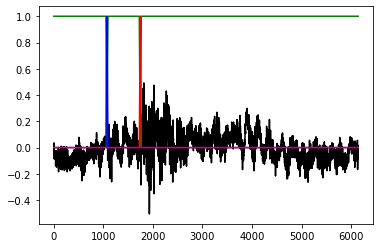

In [76]:
plt.plot(x1[0, 1], c="k")
plt.plot(x3[0, 0], c="g")
plt.plot(x3[0, 1], c="b")
plt.plot(x3[0, 2], c="r")

### 模型训练
- 将训练数据输入到模型中即可

In [77]:
from models.UNet import UNet, Loss as ULoss 
model = UNet() 
model.train()
model.load_state_dict(torch.load("ckpt/diting.unet.pt", map_location="cpu"))
lossfn = ULoss()
optim = torch.optim.Adam(model.parameters(), 1e-4) 

for step in range(10):
    x1, x2, x3, x4 = datatool.batch_data()
    wave = torch.tensor(x1, dtype=torch.float32)
    label = torch.tensor(x3, dtype=torch.float32) 
    y = model(wave)
    loss = lossfn(y, label)
    loss.backward() 
    optim.step()
    optim.zero_grad()
    if step %2==0:
        print(step, loss)
        torch.save(model.state_dict(), "ckpt/unet.temp.pt")

0 tensor(114103.6250, grad_fn=<NegBackward0>)
2 tensor(115883.5938, grad_fn=<NegBackward0>)
4 tensor(117139.7578, grad_fn=<NegBackward0>)
6 tensor(109532.8750, grad_fn=<NegBackward0>)
8 tensor(105643.0469, grad_fn=<NegBackward0>)
